# Exploratory Data Analysis - Facebook metrics Data Set

The following notebook serves as the programming task for **Homework 1: Exploratory Data Analysis**. As such, a dataset pertaining to a Facebook page dated 2014 is described and analysed.  
*The original dataset was downloaded from https://archive.ics.uci.edu/ml/datasets/Facebook+metrics* 

Analysis and characterization are done according to the following points:
1. Terminology used
2. Variables and data types
3. Missing value treatment (if any)
4. Statistical univariate analysis
5. Scaling and normalization
6. Bivariate analysis

## Terminology used

Understanding the data usually requires learning new terminology. That was the case for this dataset - the nomenclature employed is common in the digital marketing field. The following definitions were needed:  

* Impression: Number of times the publication appeared on users' screens;
* Reach: Number of users to which the publication appeared on the screen;
* Engaged user: User that clicked anywhere in the publication;
* Consumer: User that clicked anywhere in the publication, from within your page or publication; 
* Interaction: Liking, commeting or sharing a publication;

Others, such as like, comment and share, are of common usage and thus not here defined.

## Variables and Data Types

Loading the dataset and looking at the variables and the data types gives us an insight at what to expect:

In [91]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv("dataset_Facebook.csv", sep=";")
display(df.head(5))

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [93]:
display(df.dtypes)

Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

As can be seen from the result of the cell above, most of the variables are numeric except for *Type*, which is a string describing the type of publication - Photo, Status update, Link or Video:

In [94]:
print(df["Type"].unique())

['Photo' 'Status' 'Link' 'Video']


The *Paid* variable simply describes if a post's spread was paid for (1) or not (0). Below we can already see that the column has NaN values.

In [95]:
print(df["Paid"].unique())

[ 0.  1. nan]


*Category* is a set of discrete values that represent a factor used by Facebook page managers - action (1), product (2) and inspiration (3). With their meaning being:
* Action: Special offers and contests;
* Product: direct advertisement, explicit brand content;
* Inspiration: non-explicit brand related content;

In [96]:
print(df["Category"].unique())

[2 3 1]


*Post Month*, *Post Weekday* and *Post Hour* are all self-describing. All consist in discrete sets as listed below.

In [97]:
columns = ["Post Month", "Post Weekday", "Post Hour"]
for col in columns:
    value_list = df[col].unique()
    value_list.sort()
    print("%s: %s" % (col, value_list))

Post Month: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Post Weekday: [1 2 3 4 5 6 7]
Post Hour: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23]


Between the *Lifetime* variables there are some relations due to their definitions:
* *Lifetime Post Total Reach* (renamed as *Reach*) is already accounted for in *Lifetime Post Total Impressions*(renamed as *Impressions*), which is to say: $Impressions=Reach+C$
* *Total interactions* (renamed *Interactions*) is already accounted for in *Lifetime Post Total Consumptions* (renamed *Consumptions*), with a similar relations as above. In its turn, *Consumption* is already accounted for in *Reach*;
* *Lifetime Post Consumers* (renamed *Consumers*) is already accounted for in *Lifetime Engaged Users* (renamed *Engaged*)
* *Lifetime People who have liked your Page and engaged with your post* (renamed as *Enganged AND Page Liked*) is already accounted for in *Lifetime Post reach by people who like your Page* (renamed as *Reached AND Page Liked*), which in turn is accounted for in *Lifetime Post Impressions by people who have liked your Page* (renamed as *Impressed AND Page Liked*)


In [98]:
# Column renaming and reordering

renaming_dict={"Lifetime Post Total Reach": "Reach", "Lifetime Post Total Impressions": "Impressions",
               "Total Interactions": "Interactions", "Lifetime Post Consumptions": "Consumptions",
               "Lifetime Post Consumers": "Consumers", "Lifetime Engaged Users": "Engaged",
               "Lifetime People who have liked your Page and engaged with your post": "Enganged AND Page Liked",
               "Lifetime Post reach by people who like your Page": "Reached AND Page Liked",
               "Lifetime Post Impressions by people who have liked your Page": "Impressed AND Page Liked",
               "Post Month": "Month", "Post Weekday": "Weekday", "Post Hour": "Hour"}

df = df.rename(columns=renaming_dict)

reindex_list = ["Page total likes", "Type", "Category", "Paid", "Month", "Weekday", "Hour", "Impressions", "Reach", 
                "Consumptions", "Interactions", "like", "share", "comment", "Engaged", "Consumers", 
                "Impressed AND Page Liked", "Reached AND Page Liked", "Enganged AND Page Liked"]

df = df.reindex(columns=reindex_list)

display(df.head(5))

,Page total likes,Type,Category,Paid,Month,Weekday,Hour,Impressions,Reach,Consumptions,Interactions,like,share,comment,Engaged,Consumers,Impressed AND Page Liked,Reached AND Page Liked,Enganged AND Page Liked
0,139441,Photo,2,0.0,12,4,3,5091,2752,159,100,79.0,17.0,4,178,109,3078,1640,119
1,139441,Status,2,0.0,12,3,10,19057,10460,1674,164,130.0,29.0,5,1457,1361,11710,6112,1108
2,139441,Photo,3,0.0,12,3,3,4373,2413,154,80,66.0,14.0,0,177,113,2812,1503,132
3,139441,Photo,2,1.0,12,2,10,87991,50128,1119,1777,1572.0,147.0,58,2211,790,61027,32048,1386
4,139441,Photo,2,0.0,12,2,3,13594,7244,580,393,325.0,49.0,19,671,410,6228,3200,396


## Missing values and conversions

From the previous descriptions we already know that the variable *Paid* has at least one missing value, categorized as NaN. A simple script can determine where else there are missing value.

In [99]:
for col in df.columns.values:
    if df[col].isnull().values.any():
        print("%s has %d missing values" % (col, df[col].isnull().sum()))

Paid has 1 missing values
like has 1 missing values
share has 4 missing values


For the *Paid* variable, we will simply assume a value of 0 - as if the post wasn't paid. For the other two variables, we will equal them to the mean of the variable.

In [100]:
df["Paid"] = df["Paid"].fillna(0.0)
df["like"] = df["like"].fillna(df["like"].mean())
df["share"] = df["share"].fillna(df["share"].mean())

There are two attributes that are categorical and nominal - *Category* and *Type*. For these, one-hot encoding can be performed.

In [101]:
cat_map = dict([(1, "Action"), (2, "Product"), (3, "Inspiration")])
df["Category"] = df["Category"].map(cat_map)

In [102]:
onehot = pd.get_dummies(df[["Category", "Type"]])
display(onehot.head(5))

,Category_Action,Category_Inspiration,Category_Product,Type_Link,Type_Photo,Type_Status,Type_Video
0,0,0,1,0,1,0,0
1,0,0,1,0,0,1,0
2,0,1,0,0,1,0,0
3,0,0,1,0,1,0,0
4,0,0,1,0,1,0,0


In [103]:
df = df.join(onehot, how="outer")
display(df)

,Page total likes,Type,Category,Paid,Month,Weekday,Hour,Impressions,Reach,Consumptions,...,Impressed AND Page Liked,Reached AND Page Liked,Enganged AND Page Liked,Category_Action,Category_Inspiration,Category_Product,Type_Link,Type_Photo,Type_Status,Type_Video
0,139441,Photo,Product,0.0,12,4,3,5091,2752,159,...,3078,1640,119,0,0,1,0,1,0,0
1,139441,Status,Product,0.0,12,3,10,19057,10460,1674,...,11710,6112,1108,0,0,1,0,0,1,0
2,139441,Photo,Inspiration,0.0,12,3,3,4373,2413,154,...,2812,1503,132,0,1,0,0,1,0,0
3,139441,Photo,Product,1.0,12,2,10,87991,50128,1119,...,61027,32048,1386,0,0,1,0,1,0,0
4,139441,Photo,Product,0.0,12,2,3,13594,7244,580,...,6228,3200,396,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,Inspiration,0.0,1,7,2,7536,4684,985,...,4750,2876,392,0,1,0,0,1,0,0
496,81370,Photo,Product,0.0,1,5,8,6229,3480,687,...,3961,2104,301,0,0,1,0,1,0,0
497,81370,Photo,Action,0.0,1,5,2,7216,3778,795,...,4742,2388,363,1,0,0,0,1,0,0
498,81370,Photo,Inspiration,0.0,1,4,11,7564,4156,832,...,4534,2452,370,0,1,0,0,1,0,0


## Statistical Univariate Analysis

Converting the type label from nominal to ordinal as: Photo:=1, Status:=2, Link:=3, Video:=4. 

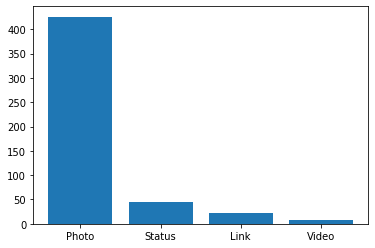

In [104]:
bar_plot = plt.bar(x=df["Type"].unique(), height=df["Type"].value_counts().values)

In [105]:
conv_map = {"Photo": 1, "Status": 2, "Link": 3, "Video": 4}
df["Type"] = df["Type"].map(conv_map)

Counting the number of paid posts:

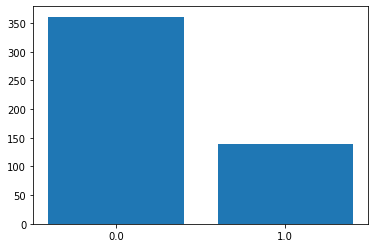

In [106]:
paid_temp = df["Paid"].dropna()
bar_plot = plt.bar(x=paid_temp.unique(), height=paid_temp.value_counts().values, tick_label=paid_temp.unique())

Looking at the common metrics:

In [107]:
def box_plot_side_by_side(col_list, showoutliers=True):
    fig, ax = plt.subplots(nrows=1, ncols=len(col_list))
    fig.set_figwidth(4*len(col_list))

    for i in range(0, len(col_list)):
        ax[i].boxplot(x=df[col_list[i]], showfliers=showoutliers)
        ax[i].set_xlabel(col_list[i])
        ax[i].set_xticks([])
    
    plt.show()

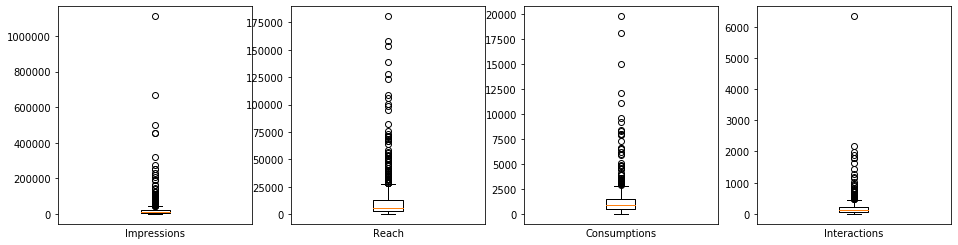

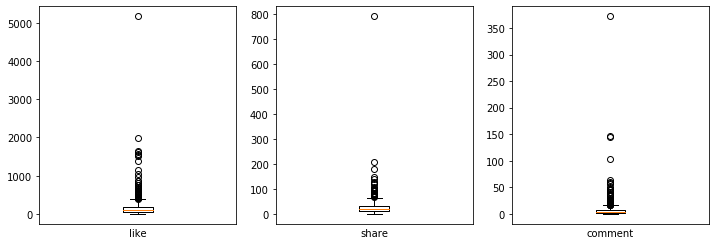

In [108]:
box_plot_side_by_side(["Impressions", "Reach", "Consumptions", "Interactions"])
box_plot_side_by_side(["like", "share", "comment"])

The boxplots discarding the outliers:

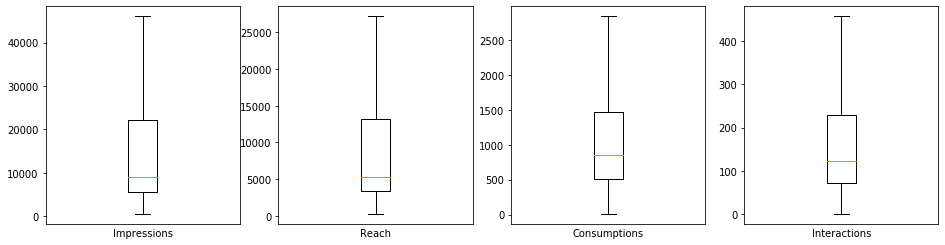

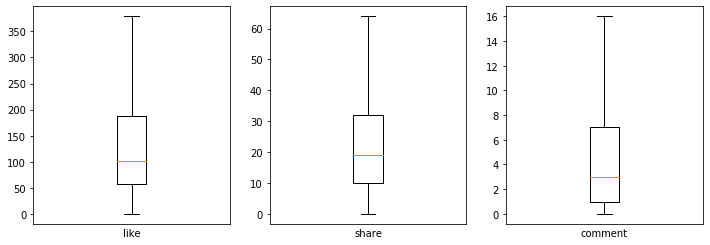

In [109]:
box_plot_side_by_side(["Impressions", "Reach", "Consumptions", "Interactions"], showoutliers=False)
box_plot_side_by_side(["like", "share", "comment"], showoutliers=False)

In [110]:
def hist_side_by_side(col_list, thousands=False):
    fig, ax = plt.subplots(nrows=1, ncols=len(col_list), sharey=True)
    fig.set_figwidth(5*len(col_list))
    k = 1
    if thousands:
        k = 1000
    
    for i in range(0, len(col_list)):

        ax[i].hist(x=df[col_list[i]]/k, bins=20)
        if thousands:
            ax[i].set_xlabel(col_list[i]+" [thousands]")
        else:
            ax[i].set_xlabel(col_list[i])
        if i == 0:
            ax[i].set_ylabel("Post count")
    plt.show()

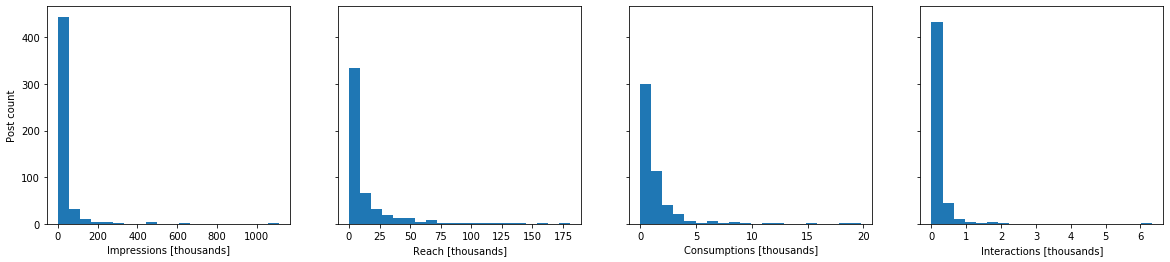

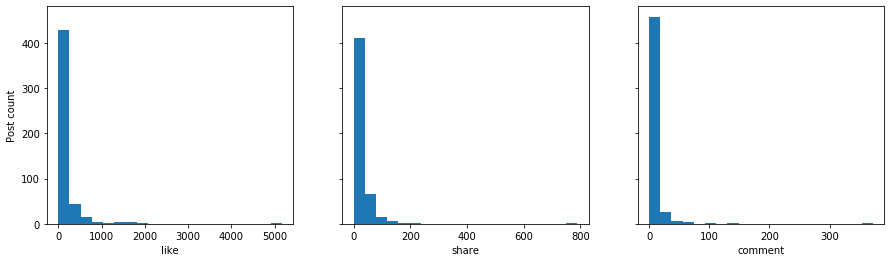

In [111]:
hist_side_by_side(["Impressions", "Reach", "Consumptions", "Interactions"], thousands=True)
hist_side_by_side(["like", "share", "comment"])

Interesting relations to observe are: *Page total likes* evolution in time, Interaction-Impression ratio for each publication and the variation of engaged users.

In [112]:
df["Interaction/Impression"] = df["Interactions"]/df["Impressions"]
page_like_variation = []
engaged_users_variation = []
for i in range(0, len(df)):
    if i < len(df)-1:
        page_like_variation.append(df["Page total likes"].iloc[i] - df["Page total likes"].iloc[i+1])
        engaged_users_variation.append(df["Engaged"].iloc[i] - df["Engaged"].iloc[i+1])
    else:
        page_like_variation.append(0)
        engaged_users_variation.append(0)
        
df["Page likes variation"] = page_like_variation
df["Engaged variation"] = engaged_users_variation

The scatter plots are then:

In [113]:
def scatter_side_by_side(col_list):
    fig, ax = plt.subplots(nrows=1, ncols=len(col_list))
    fig.set_figwidth(7*len(col_list))

    for i in range(0, len(col_list)):
        ax[i].scatter(x=df.index, y=df[col_list[i]], s=1)
        # Note: Id 0 corresponds to the latest entry, x-axis is inverted so it's more intuitive
        ax[i].invert_xaxis()
        ax[i].set_ylabel(col_list[i])
    plt.show()


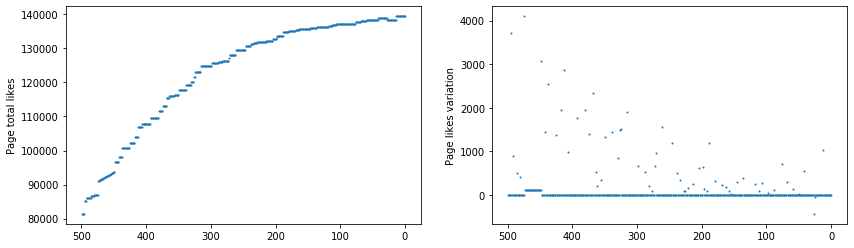

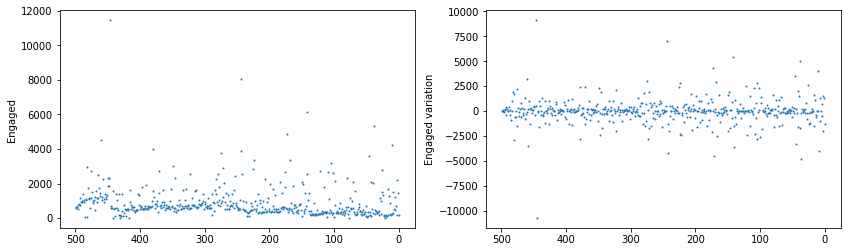

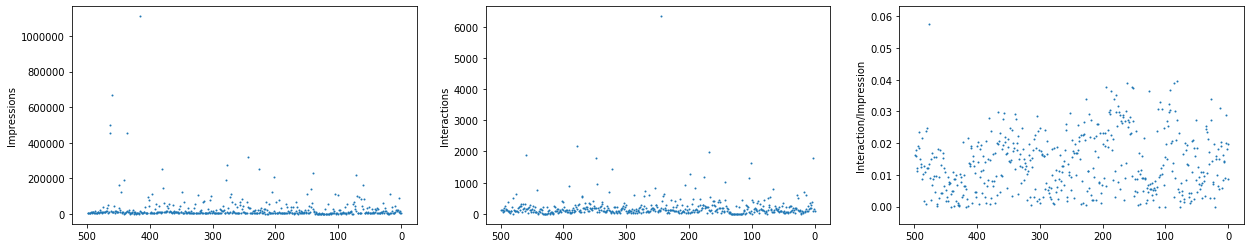

In [114]:
scatter_side_by_side(["Page total likes", "Page likes variation"])
scatter_side_by_side(["Engaged", "Engaged variation"])
scatter_side_by_side(["Impressions", "Interactions", "Interaction/Impression"])

The scatter plots do not seem to bring much relevant information besides for *Page total likes* which is similar to a logistic curve. If we group by *Month* and *Weekday* some relevance may be extracted. For marketing purposes, one of the main criteria is the Interaction-Impression ratio, hence the below plots focus on that variable.

In [115]:
grouped_by_month_sum = df.groupby(["Month"]).sum()
grouped_by_weekday_sum = df.groupby(("Weekday")).sum()
grouped_by_month_mean = df.groupby(["Month"]).mean()
grouped_by_weekday_mean = df.groupby(("Weekday")).mean()

In [116]:
def groupby_barplot(bycol, col_list):
    groupby_sum = df.groupby([bycol]).sum()
    groupby_mean = df.groupby([bycol]).mean()
    
    if len(col_list) == 1:
        fig, ax = plt.subplots(nrows=1, ncols=1)
        fig.set_figheight(2)
    else:
        fig, ax = plt.subplots(nrows=len(col_list), ncols=2)
        fig.suptitle("Grouped by "+bycol)
        fig.set_figheight(6)
    fig.set_figwidth(5*len(col_list))
    fig.set_figheight(6)
    
    for i in range(0, len(col_list)):
        if len(col_list) == 1:
            ax.bar(groupby_mean.index, groupby_mean[col_list[i]])
            ax.set_title(col_list[i]+" mean")
            break
            
        ax[i][0].bar(groupby_sum.index, groupby_sum[col_list[i]])
        ax[i][0].set_title(col_list[i]+" sum")
        ax[i][1].bar(groupby_mean.index, groupby_mean[col_list[i]])
        ax[i][1].set_title(col_list[i]+" mean")
        
    
    #plt.bar(grouped_by_month.index, grouped_by_month["Page Likes Variation by Month"]
    plt.tight_layout()
    plt.show()

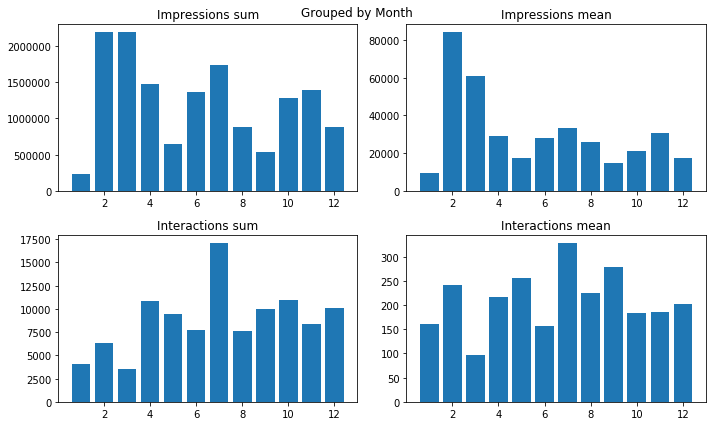

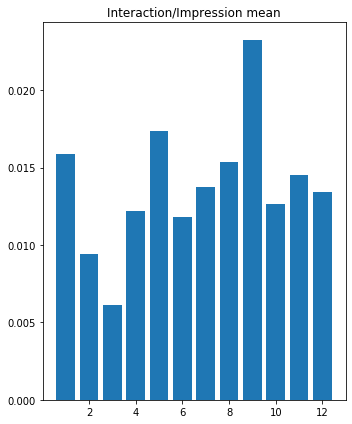

In [117]:
groupby_barplot("Month", ["Impressions", "Interactions"])
groupby_barplot("Month", ["Interaction/Impression"])

From the above plots the following information is extracted:
1. The months of February and March have the most impressions, and February is the month with the highest average of post impression;
2. July is the month with the highest number of interactions and is also the one with highest average of post interaction;
3. September is the month with highest interaction-impression ratio average;

We can also analyse the impact of weekday:

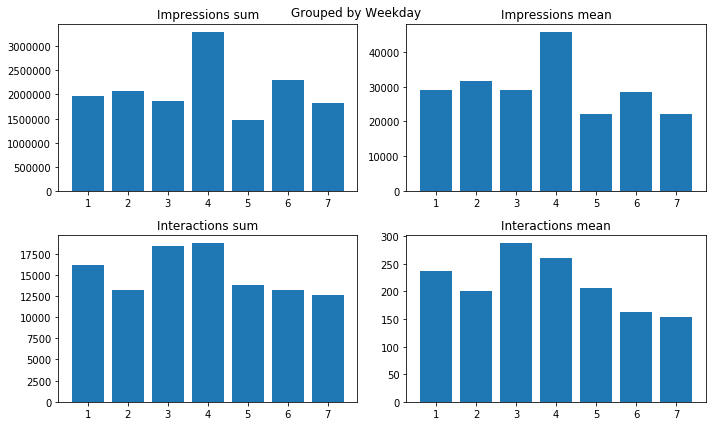

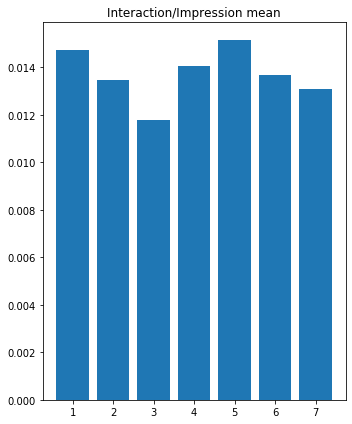

In [118]:
groupby_barplot("Weekday", ["Impressions", "Interactions"])
groupby_barplot("Weekday", ["Interaction/Impression"])

What we can see:
1. Wednesday is the day with the most impressions and with the highest average of post impression;
2. Tuesday and Wednesday are the days with most interactions and Tuesday has higher average of post interaction;
3. Monday and Thursday are the days with highest interaction-impression ratio average, with  Thursday slightly greater than Monday;
4. The scale is highly relevant for the last plot's interpretation, with the lowest value being around 0.012 and the highest slightly aboce 0.014. Which is to say that the variation is less than 1%, most likely negligible;

### Statistics table

Below is a table containing univariate statistical quantities regarding the data set. 

In [124]:
stats = pd.DataFrame()
df = df.drop(["Category", "Type"], axis=1)
stats["Feature"] = df.columns.values
stats["Mean"] = df.mean().values 
stats["Median"] = df.median().values
stats["Variance"] = df.var().values
stats["Stand Dev"] = df.std().values
stats["Q1"] = df.quantile(0.25).values
stats["Q3"] = df.quantile(0.75).values
stats["Minimum"] = df.min().values
stats["Maximum"] = df.max().values

display(stats)

,Feature,Mean,Median,Variance,Stand Dev,Q1,Q3,Minimum,Maximum
0,Page total likes,123194.176000,129600.000000,2.648044e+08,16272.813214,112676.000000,136393.000000,81370.0,1.394410e+05
1,Paid,0.278000,0.000000,2.011182e-01,0.448462,0.000000,1.000000,0.0,1.000000e+00
2,Month,7.038000,7.000000,1.094244e+01,3.307936,4.000000,10.000000,1.0,1.200000e+01
3,Weekday,4.150000,4.000000,4.123747e+00,2.030701,2.000000,6.000000,1.0,7.000000e+00
4,Hour,7.840000,9.000000,1.908457e+01,4.368589,3.000000,11.000000,1.0,2.300000e+01
5,Impressions,29585.948000,9051.000000,5.898739e+09,76803.246670,5694.750000,22085.500000,570.0,1.110282e+06
6,Reach,13903.360000,5281.000000,5.171434e+08,22740.787890,3315.000000,13168.000000,238.0,1.804800e+05
7,Consumptions,1415.130000,851.000000,4.002377e+06,2000.594118,509.250000,1463.000000,9.0,1.977900e+04
8,Interactions,212.120000,123.500000,1.445772e+05,380.233118,71.000000,228.500000,0.0,6.334000e+03
9,like,177.945892,101.000000,1.043772e+05,323.074532,56.750000,187.250000,0.0,5.172000e+03


## Scaling and normalization

From what we have seen of the data, we conclude that the data does not follow a Gaussian distribution. Hence, min-max normalization is applied for future applications of the data.

In [125]:
norm_df = pd.DataFrame()

for col in df.columns.values:
    norm_df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())
    
display(norm_df)

,Page total likes,Paid,Month,Weekday,Hour,Impressions,Reach,Consumptions,Interactions,like,...,Category_Action,Category_Inspiration,Category_Product,Type_Link,Type_Photo,Type_Status,Type_Video,Interaction/Impression,Page likes variation,Engaged variation
0,1.000000,0.0,1.0,0.500000,0.090909,0.004074,0.013948,0.007587,0.015788,0.015275,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.340284,0.096319,0.476795
1,1.000000,0.0,1.0,0.333333,0.409091,0.016659,0.056713,0.084219,0.025892,0.025135,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.149085,0.096319,0.605745
2,1.000000,0.0,1.0,0.333333,0.090909,0.003427,0.012067,0.007334,0.012630,0.012761,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.316924,0.096319,0.438750
3,1.000000,1.0,1.0,0.166667,0.409091,0.078778,0.276795,0.056146,0.280549,0.303944,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.349860,0.096319,0.618846
4,1.000000,0.0,1.0,0.166667,0.090909,0.011736,0.038870,0.028882,0.062046,0.062838,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.500829,0.096319,0.515042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.064111,0.0,0.0,1.000000,0.045455,0.006277,0.024667,0.049368,0.013262,0.010247,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.193100,0.916905,0.551121
496,0.000000,0.0,0.0,0.666667,0.318182,0.005100,0.017987,0.034294,0.011841,0.010247,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.208587,0.096319,0.536810
497,0.000000,0.0,0.0,0.666667,0.045455,0.005989,0.019640,0.039757,0.018156,0.017981,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.276087,0.096319,0.541194
498,0.000000,0.0,0.0,0.500000,0.454545,0.006303,0.021737,0.041629,0.021471,0.017595,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.311481,0.096319,0.544369


## Bivariate analysis

To try to find relations between the variables of the dataset we can use Pearson correlation. Variables dependent of each other will have a high correlation:
* The set of *Impressions*, *Reach*, *Consumptions* and *Interactions* will have high correlation within itself;
* *like*, *comment* and *share* will have a high correlation with *Interactions*
* Variables of the type *X AND Page Like* will have a high correlation with *X*, being a subset of it;
* *Page total likes* will increase as time passes, high correlation with *Month* is expected (as seen in the scatter plot)

Correlation between other variables are of interest.

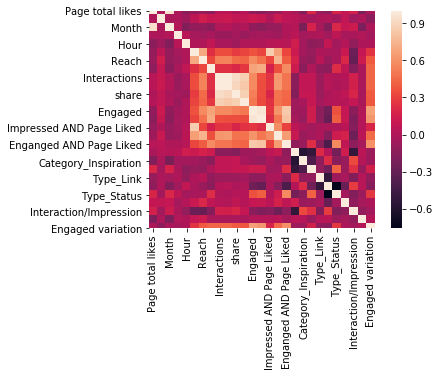

In [126]:
pearson = df.corr()
heatmap = sns.heatmap(pearson, square=True)